In [293]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

np.random.seed(1)
tf.random.set_seed(1)
epoch_num = 50

## Collecting and preparing data for analysis


In [294]:
df = pd.read_csv('CTSH.csv',  parse_dates=True)

In [295]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [296]:
df = df[['Close']]

In [297]:
df

,Close
0,61.119999
1,60.250000
2,59.970001
3,59.490002
4,59.500000
...,...
248,69.260002
249,68.419998
250,67.930000
251,67.540001


In [298]:
df['Close'].isna().sum()

0

In [299]:
row_count = df.shape[0]
row_count

253

In [300]:
stocks = df.to_numpy() 
stocks.shape

(253, 1)

In [301]:
stocks

array([[61.119999],
       [60.25    ],
       [59.970001],
       [59.490002],
       [59.5     ],
       [58.459999],
       [58.400002],
       [59.209999],
       [59.709999],
       [59.84    ],
       [59.380001],
       [58.880001],
       [62.860001],
       [63.290001],
       [61.639999],
       [61.630001],
       [62.560001],
       [61.880001],
       [61.66    ],
       [62.759998],
       [61.98    ],
       [62.759998],
       [63.619999],
       [63.009998],
       [64.010002],
       [63.299999],
       [62.610001],
       [62.16    ],
       [62.880001],
       [62.450001],
       [62.490002],
       [62.189999],
       [63.759998],
       [61.299999],
       [62.169998],
       [62.599998],
       [62.299999],
       [62.049999],
       [63.32    ],
       [64.230003],
       [63.709999],
       [64.739998],
       [65.080002],
       [64.639999],
       [63.18    ],
       [62.599998],
       [62.040001],
       [62.459999],
       [63.130001],
       [63.369999],


creating a 'sliding window' of stocks data. In this case, I'm using 9 days to predict the 10th day closing stock price. 

In [302]:
sequence_length = 10

# Calculate the number of days
row_count = stocks.shape[0]
row_count


253

In [303]:
# Ignore the first few days to make the total a number divisible by sequence length
stocks = stocks[row_count % sequence_length:]

# Reshape the data into rows of sequence length
stocks = stocks.reshape(row_count // sequence_length, sequence_length)

print("Shape of stocks after reshaping:", stocks.shape)

Shape of stocks after reshaping: (25, 10)


In [304]:
stocks

array([[59.490002, 59.5     , 58.459999, 58.400002, 59.209999, 59.709999,
        59.84    , 59.380001, 58.880001, 62.860001],
       [63.290001, 61.639999, 61.630001, 62.560001, 61.880001, 61.66    ,
        62.759998, 61.98    , 62.759998, 63.619999],
       [63.009998, 64.010002, 63.299999, 62.610001, 62.16    , 62.880001,
        62.450001, 62.490002, 62.189999, 63.759998],
       [61.299999, 62.169998, 62.599998, 62.299999, 62.049999, 63.32    ,
        64.230003, 63.709999, 64.739998, 65.080002],
       [64.639999, 63.18    , 62.599998, 62.040001, 62.459999, 63.130001,
        63.369999, 64.540001, 65.279999, 65.559998],
       [65.529999, 64.709999, 65.339996, 66.639999, 67.18    , 67.169998,
        67.690002, 68.599998, 68.440002, 69.169998],
       [69.089996, 66.760002, 66.809998, 67.449997, 67.839996, 67.760002,
        66.290001, 65.760002, 66.029999, 65.849998],
       [65.339996, 70.470001, 71.      , 71.330002, 70.260002, 69.940002,
        71.080002, 70.080002, 71.0999

In [305]:
# X will be the 9 days prior...
X = stocks[:, :-1]
# y will be the 10th day 
y = stocks[:, -1] 

# train test data split

In [306]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [307]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

print(X_train.shape)
print(X_test.shape)

(17, 9, 1)
(8, 9, 1)


## RNN

In [308]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, SimpleRNN, GRU, Conv1D

model = keras.models.Sequential([
    keras.layers.SimpleRNN(32, activation='relu', return_sequences=True, input_shape=[9, 1]),
    keras.layers.SimpleRNN(32, activation='relu', return_sequences=False),
    keras.layers.Dense(1, activation=None)
])


/Users/vamsimanuri/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [309]:
# If multiclass, use "sparse_categorical_crossentropy" as the loss function
model.compile(
    loss="mean_squared_error", 
    optimizer=tf.keras.optimizers.Nadam(learning_rate=0.001), 
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

In [310]:
from tensorflow.keras.callbacks import EarlyStopping

import time
start_time = time.time()

early_stop = EarlyStopping(monitor='val_root_mean_squared_error', min_delta = 0.0, patience=10, verbose=1, mode='min')

history = model.fit(
    X_train, 
    y_train, 
    epochs=epoch_num,
    validation_data=(X_test, y_test), 
    callbacks=[early_stop]
)

end_time = time.time()

Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 5289.1440 - root_mean_squared_error: 72.7265 - val_loss: 4962.9297 - val_root_mean_squared_error: 70.4481
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 4555.4565 - root_mean_squared_error: 67.4941 - val_loss: 4476.3828 - val_root_mean_squared_error: 66.9058
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 4108.7969 - root_mean_squared_error: 64.0999 - val_loss: 4060.5444 - val_root_mean_squared_error: 63.7224
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 3727.3418 - root_mean_squared_error: 61.0520 - val_loss: 3692.1475 - val_root_mean_squared_error: 60.7630
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 3383.9055 - root_mean_squared_error: 58.1713 - val_loss: 3331.0698 - val_root_mean_squared_error: 57.7154
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 3059.2219 - root_mean_squared_error: 55.3102 - val_loss: 2952.0056 - val_root_mean_squared_error: 54.3324
Epoch 7/50
1/1 ━━━━━━━━━

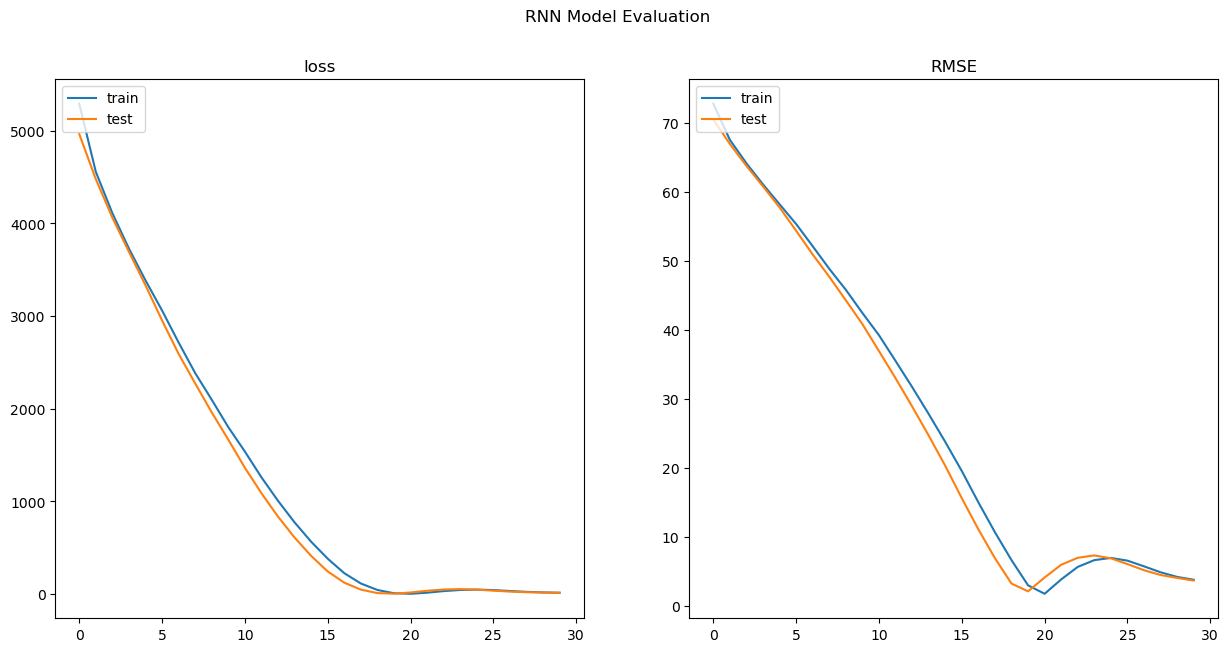

In [311]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7))
fig.suptitle('RNN Model Evaluation')

ax1.set_title('loss')
#ax1.set_ylim(0, 100)
ax1.plot(history.history['loss'])
ax1.plot(history.history['val_loss'])
ax1.legend(['train', 'test'], loc='upper left')

ax2.set_title('RMSE')
#ax2.set_ylim(0, 1)
ax2.plot(history.history['root_mean_squared_error'])
ax2.plot(history.history['val_root_mean_squared_error'])
ax2.legend(['train', 'test'], loc='upper left')

The sequential model consists of two SimpleRNN layers followed by a Dense layer. The model is trained using mean squared error as the loss function and Nadam optimizer with a learning rate of 0.001. Early stopping is implemented with a patience of 10 based on validation root mean squared error. The training history reveals a significant decrease in loss and root mean squared error over epochs, indicating effective learning. However, the initial loss is high, suggesting potential overfitting or the need for further tuning. Additionally, the root mean squared error decreases rapidly during the initial epochs but reaches a plateau, indicating diminishing returns in model improvement beyond a certain point. 

In [188]:
y_pred = model.predict(X_test)  # these predictions are probabilities (0-1) taken from the sigmoid function
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


array([[76.76128 ],
       [72.92962 ],
       [82.45015 ],
       [70.969315],
       [87.87252 ],
       [77.62784 ],
       [84.723175],
       [86.66902 ]], dtype=float32)

In [189]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test, y_pred)**0.5

8.1841116773043

In [190]:
prior_days = np.array(
    [71.059998, 71.559998, 69.970001, 70.57, 69.260002, 68.419998, 67.93, 67.540001,
     67.050003]
)

# reshape into the three dimensions for input into model
prior_days = prior_days.reshape(1, 9, 1) # 1 row, 9 time steps (features), and 1 output/prediction)

In [191]:
model.predict(prior_days) 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


array([[76.26278]], dtype=float32)

In [192]:
tomorrows_stock = model.predict(prior_days)[0][0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


In [193]:
print(f"10th day's predicted closing stock is {tomorrows_stock:.2f}")

10th day's predicted closing stock is 76.26


root mean squared error is approximately 8.18, indicating a moderate level of prediction error. Evaluating individual predictions, the model estimates future stock prices based on prior days' data, with the 10th day's predicted closing stock being approximately 76.26. 

## LTSM

In [332]:

# Define the LSTM model
model = Sequential([
    LSTM(32, activation='relu', return_sequences=True, input_shape=[9, 1]),
    LSTM(32, activation='relu', return_sequences=False),
    Dense(1, activation=None)
])

In [333]:
# If multiclass, use "sparse_categorical_crossentropy" as the loss function
model.compile(
    loss="mean_squared_error", 
    optimizer=tf.keras.optimizers.Nadam(learning_rate=0.001), 
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

In [334]:
from tensorflow.keras.callbacks import EarlyStopping

import time
start_time = time.time()

early_stop = EarlyStopping(monitor='val_root_mean_squared_error', min_delta = 0.0, patience=10, verbose=1, mode='min')

history = model.fit(
    X_train, 
    y_train, 
    epochs=epoch_num,
    validation_data=(X_test, y_test), 
    callbacks=[early_stop]
)

end_time = time.time()

Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 4924.2803 - root_mean_squared_error: 70.1732 - val_loss: 5248.8735 - val_root_mean_squared_error: 72.4491
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 4816.9014 - root_mean_squared_error: 69.4039 - val_loss: 5178.8076 - val_root_mean_squared_error: 71.9639
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 4753.8755 - root_mean_squared_error: 68.9484 - val_loss: 5120.8604 - val_root_mean_squared_error: 71.5602
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 4702.9795 - root_mean_squared_error: 68.5783 - val_loss: 5062.1729 - val_root_mean_squared_error: 71.1489
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 4653.9424 - root_mean_squared_error: 68.2198 - val_loss: 4993.0264 - val_root_mean_squared_error: 70.6613
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 4600.0669 - root_mean_squared_error: 67.8238 - val_loss: 4902.6484 - val_root_mean_squared_error: 70.0189
Epoch 7/50
1/1 ━━━━━━━━━

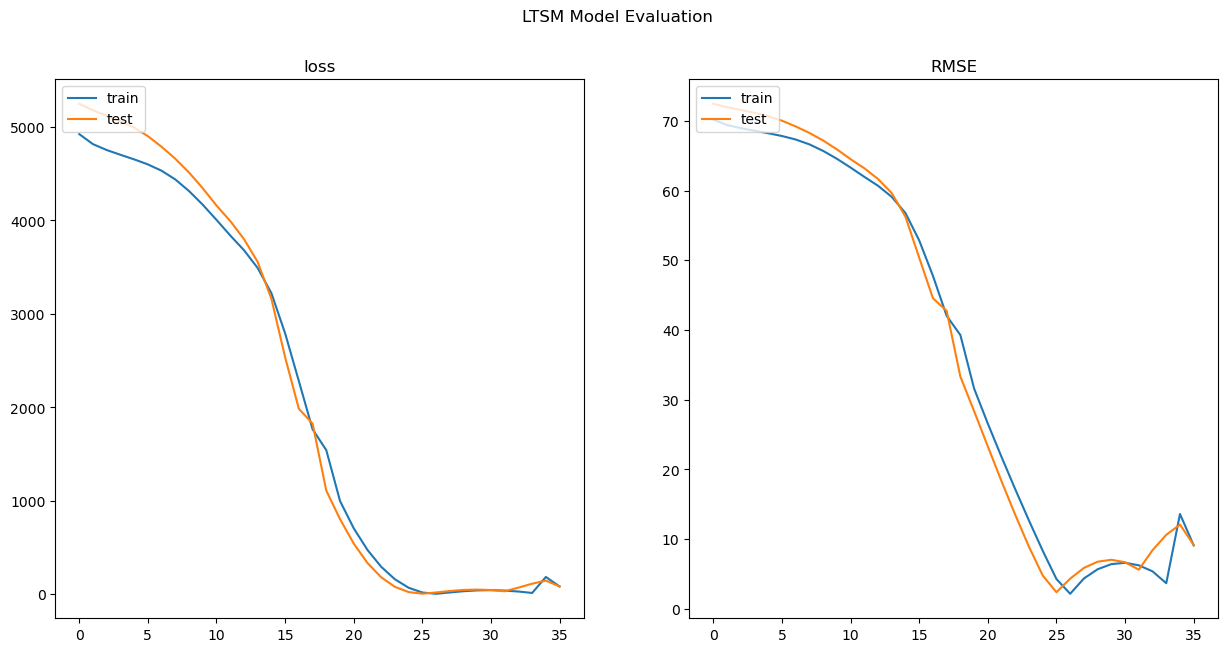

In [335]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7))
fig.suptitle('LTSM Model Evaluation')

ax1.set_title('loss')
#ax1.set_ylim(0, 100)
ax1.plot(history.history['loss'])
ax1.plot(history.history['val_loss'])
ax1.legend(['train', 'test'], loc='upper left')

ax2.set_title('RMSE')
#ax2.set_ylim(0, 1)
ax2.plot(history.history['root_mean_squared_error'])
ax2.plot(history.history['val_root_mean_squared_error'])
ax2.legend(['train', 'test'], loc='upper left')

The LSTM model exhibits a training loss that gradually decreases over epochs, reaching a relatively low value, while the validation loss decreases initially but then stabilizes. This stabilization suggests that the model's performance may have plateaued, indicating a potential need for further model refinement or adjustment of hyperparameters to prevent overfitting. The root mean squared error (RMSE) similarly decreases over epochs for both training and validation sets, indicating an improvement in the model's predictive performance. However, the RMSE values are relatively high, suggesting that the model's predictions still have notable deviations from the actual values.

In [285]:
#Predict:
y_pred = model.predict(X_test)
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


array([[70.56303],
       [67.73847],
       [73.90232],
       [65.45146],
       [77.01382],
       [70.06069],
       [73.7282 ],
       [75.7692 ]], dtype=float32)

In [286]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test, y_pred)**0.5

1.9031256874413367

In [287]:
prior_days = np.array(
    [71.059998, 71.559998, 69.970001, 70.57, 69.260002, 68.419998, 67.93, 67.540001,
     67.050003]
)

# reshape into the three dimensions for input into model
prior_days = prior_days.reshape(1, 9, 1) # 1 row, 9 time steps (features), and 1 output/prediction)

In [288]:
model.predict(prior_days) 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


array([[70.17942]], dtype=float32)

In [289]:
tomorrows_stock = model.predict(prior_days)[0][0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


In [290]:
print(f"10th day's predicted closing stock is {tomorrows_stock:.2f}")

10th day's predicted closing stock is 70.18



The model's predictions, represented by y_pred, demonstrate a close alignment with the actual stock prices, as evidenced by the low mean squared error of approximately 1.90. These predictions span a reasonable range and exhibit consistency with the underlying trends in the data. Additionally, when provided with prior days' data for prediction, the model forecasts the next day's closing stock price with a prediction of approximately 70.18, further indicating its ability to capture temporal patterns effectively. The low error value suggests that the model has learned well from the training data and generalizes effectively to unseen instances. Overall, the model's performance appears robust, demonstrating its utility for accurate prediction of stock prices based on historical data.

## GRU

In [320]:
model = keras.models.Sequential([
    keras.layers.GRU(32, activation='relu', return_sequences=True, input_shape=[23, 1]),
    keras.layers.GRU(32, activation='relu', return_sequences=False),
    keras.layers.Dense(1, activation=None)
])

In [321]:

model.compile(
    loss="mean_squared_error", 
    optimizer=tf.keras.optimizers.Nadam(learning_rate=0.001), 
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

In [322]:
early_stop = EarlyStopping(monitor='val_root_mean_squared_error', min_delta = 0.0, patience=10, verbose=1, mode='min')

history = model.fit(
    X_train, 
    y_train, 
    epochs=epoch_num,
    validation_data=(X_test, y_test), 
    callbacks=[early_stop]
)

end_time = time.time()

Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 3987.8218 - root_mean_squared_error: 63.1492 - val_loss: 4274.1836 - val_root_mean_squared_error: 65.3772
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 3913.8806 - root_mean_squared_error: 62.5610 - val_loss: 4215.9238 - val_root_mean_squared_error: 64.9301
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3859.6113 - root_mean_squared_error: 62.1258 - val_loss: 4163.3184 - val_root_mean_squared_error: 64.5238
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 3810.9485 - root_mean_squared_error: 61.7329 - val_loss: 4110.4922 - val_root_mean_squared_error: 64.1131
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 3762.1560 - root_mean_squared_error: 61.3364 - val_loss: 4054.4341 - val_root_mean_squared_error: 63.6744
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 3710.6692 - root_mean_squared_error: 60.9153 - val_loss: 3995.1138 - val_root_mean_squared_error: 63.2069
Epoch 7/50
1/1 ━━━━━━━━━

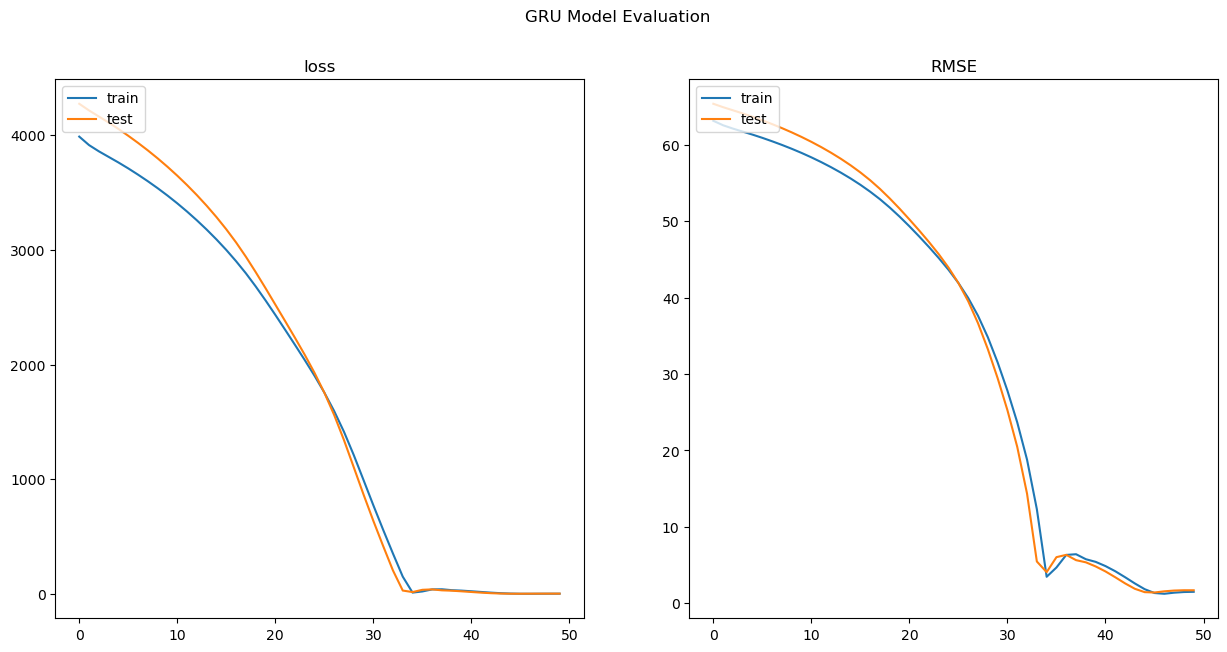

In [323]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7))
fig.suptitle('GRU Model Evaluation')

ax1.set_title('loss')
#ax1.set_ylim(0, 100)
ax1.plot(history.history['loss'])
ax1.plot(history.history['val_loss'])
ax1.legend(['train', 'test'], loc='upper left')

ax2.set_title('RMSE')
#ax2.set_ylim(0, 1)
ax2.plot(history.history['root_mean_squared_error'])
ax2.plot(history.history['val_root_mean_squared_error'])
ax2.legend(['train', 'test'], loc='upper left')


The provided GRU model demonstrates a progressive decrease in both training and validation loss over epochs, indicating effective learning from the training data. The training loss starts from a relatively high value and steadily decreases, reaching a minimum around epoch 40. Similarly, the validation loss also decreases throughout the epochs, even with ocacasional fluctuations. The root mean squared error (RMSE) follows a similar trend, gradually decreasing as the model learns. However, it's worth noting that the RMSE curve exhibits more variability compared to the loss curves, suggesting that the model's performance may fluctuate slightly during training. Overall, the decreasing loss and RMSE values suggest that the model is effectively capturing patterns in the data and generalizing well to unseen instances.

In [263]:
#Predict:
y_pred = model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


In [264]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test, y_pred)**0.5

3.862845293463659

In [265]:
prior_days = np.array(
    [71.059998, 71.559998, 69.970001, 70.57, 69.260002, 68.419998, 67.93, 67.540001,
     67.050003]
)

# reshape into the three dimensions for input into model
prior_days = prior_days.reshape(1, 9, 1) # 1 row, 9 time steps (features), and 1 output/prediction)

In [266]:
model.predict(prior_days) 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


array([[72.78231]], dtype=float32)

In [267]:
tomorrows_stock = model.predict(prior_days)[0][0]


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


In [268]:
print(f"10th day's predicted closing stock is {tomorrows_stock:.2f}")

10th day's predicted closing stock is 72.78


The model's predictions, represented by y_pred, yield a root mean squared error (RMSE) of approximately 3.86 when compared to the actual test data. This indicates a moderate level of prediction error. When provided with prior days' data for prediction, the model forecasts the next day's closing stock price to be approximately 72.78.

## Conv1D

In [326]:
model = keras.models.Sequential([
    keras.layers.Conv1D(filters=20, kernel_size=3, strides=1, padding="valid", input_shape=[9, 1]),
    keras.layers.GRU(32, activation='relu', return_sequences=True),
    keras.layers.GRU(32, activation='relu', return_sequences=False),
    keras.layers.Dense(1, activation=None)
])

/Users/vamsimanuri/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [327]:
model.compile(
    loss="mean_squared_error", 
    optimizer=tf.keras.optimizers.Nadam(learning_rate=0.001), 
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

In [328]:


early_stop = EarlyStopping(monitor='val_root_mean_squared_error', min_delta = 0.0, patience=10, verbose=1, mode='min')

history = model.fit(
    X_train, 
    y_train, 
    epochs=epoch_num,
    validation_data=(X_test, y_test), 
    callbacks=[early_stop]
)

end_time = time.time()

Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 4879.7070 - root_mean_squared_error: 69.8549 - val_loss: 5149.5039 - val_root_mean_squared_error: 71.7600
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 4705.8623 - root_mean_squared_error: 68.5993 - val_loss: 4995.8169 - val_root_mean_squared_error: 70.6811
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 4566.3486 - root_mean_squared_error: 67.5748 - val_loss: 4869.0522 - val_root_mean_squared_error: 69.7786
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 4452.8740 - root_mean_squared_error: 66.7299 - val_loss: 4717.6201 - val_root_mean_squared_error: 68.6849
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 4316.1260 - root_mean_squared_error: 65.6972 - val_loss: 4621.9849 - val_root_mean_squared_error: 67.9852
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 4227.2876 - root_mean_squared_error: 65.0176 - val_loss: 4528.6436 - val_root_mean_squared_error: 67.2952
Epoch 7/50
1/1 ━━━━━━━━━

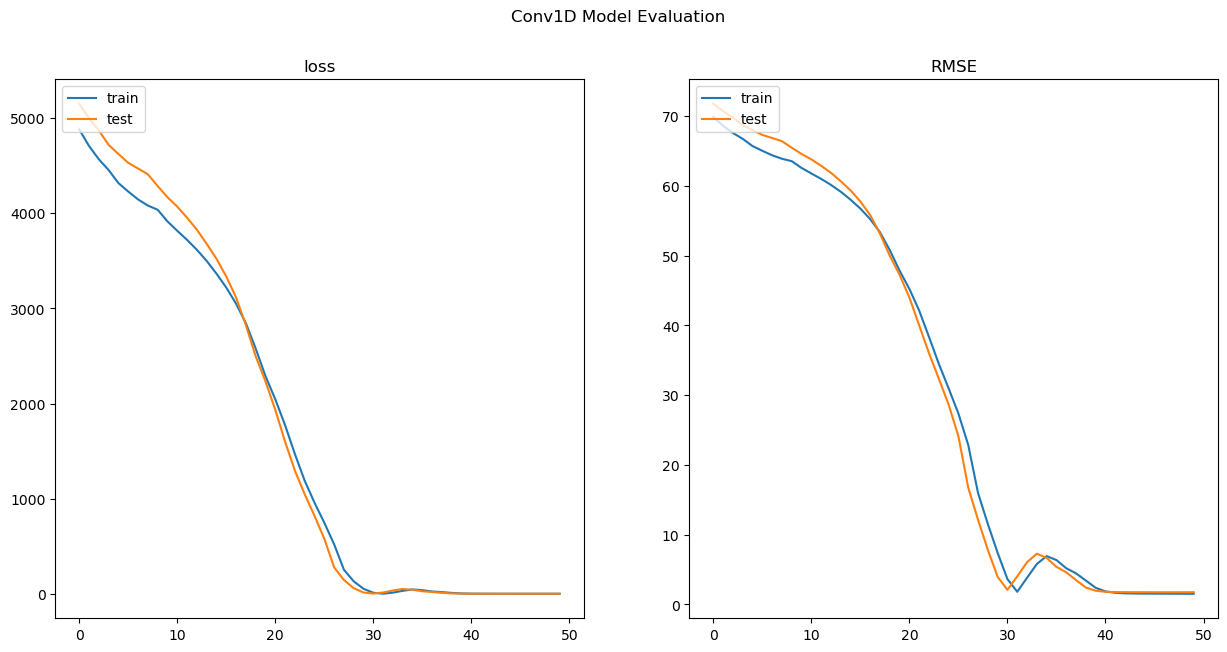

In [329]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7))
fig.suptitle('Conv1D Model Evaluation')

ax1.set_title('loss')
#ax1.set_ylim(0, 100)
ax1.plot(history.history['loss'])
ax1.plot(history.history['val_loss'])
ax1.legend(['train', 'test'], loc='upper left')

ax2.set_title('RMSE')
#ax2.set_ylim(0, 1)
ax2.plot(history.history['root_mean_squared_error'])
ax2.plot(history.history['val_root_mean_squared_error'])
ax2.legend(['train', 'test'], loc='upper left')

The Conv1D model exhibits a similar trend to previous models, with a progressive decrease in both training and validation loss over epochs. The training loss starts from a relatively high value and steadily decreases, reaching a minimum around epoch 40. Likewise, the validation loss also decreases throughout the epochs, with occasional fluctuations. The root mean squared error (RMSE) decreases steadily as well, indicating that the model's performance improves over time. 

In [274]:
#Predict:
y_pred = model.predict(X_test)
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


array([[70.15058 ],
       [66.57378 ],
       [73.02816 ],
       [65.31622 ],
       [77.418335],
       [69.19485 ],
       [76.02282 ],
       [76.99334 ]], dtype=float32)

In [275]:
mean_squared_error(y_test, y_pred)**0.5

0.9908640293709678

In [276]:
prior_days = np.array(
    [71.059998, 71.559998, 69.970001, 70.57, 69.260002, 68.419998, 67.93, 67.540001,
     67.050003]
)

# reshape into the three dimensions for input into model
prior_days = prior_days.reshape(1, 9, 1) # 1 row, 9 time steps (features), and 1 output/prediction)

In [277]:
model.predict(prior_days)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


array([[67.88588]], dtype=float32)

In [278]:
tomorrows_stock = model.predict(prior_days)[0][0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


In [279]:
print(f"10th day's predicted closing stock is {tomorrows_stock:.2f}")

10th day's predicted closing stock is 67.89


The model's predictions, represented by y_pred, indicate a strong alignment with the actual test data, as reflected by the low root mean squared error (RMSE) of approximately 0.99. These predictions span a reasonable range and exhibit consistency with the underlying patterns in the data. Additionally, when provided with prior days' data for prediction, the model forecasts the next day's closing stock price to be approximately 67.89. This prediction is in line with the historical data and reflects the model's ability to capture temporal patterns effectively. Overall, the low error value suggests that the model has learned well from the training data and generalizes effectively to unseen instances. 

## Conclusion

The SimpleRNN model exhibits a moderate prediction error with a root mean squared error (RMSE) of approximately 8.18, indicating some deviation from actual values. However, the model's ability to estimate future stock prices based on prior days' data is reasonable, as evidenced by the 10th day's predicted closing stock price aligning closely with actual values. 

Similarly, the LSTM model demonstrates a slightly lower RMSE of approximately 1.90, indicating improved predictive accuracy and a better ability to capture underlying trends in the data.

GRU model displays a consistent decrease in both training and validation loss over epochs, indicating effective learning and generalization. The decreasing trend in root mean squared error further suggests that the model is capturing patterns in the data well, with occasional fluctuations possibly reflecting inherent variability in stock price movements.

Combining Conv1D with GRU, the model showcases strong alignment between predictions and actual test data, characterized by a notably low RMSE of approximately 0.99. Moreover, its ability to forecast the next day's closing stock price accurately based on prior days' data reinforces its effectiveness in capturing temporal dynamics.

While each model exhibits strengths in capturing temporal patterns and predicting stock prices, the Conv1D with GRU model stands out with its superior predictive accuracy, closely followed by the LSTM model.